<a href="https://colab.research.google.com/github/apoorvasj/EDA-Project-22BDS0443/blob/main/EDA_project_phase2_22bds0443.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 22BDS0443 Apoorva S Jagadeesan

#Time Series Analysis
Even though the Bank Marketing dataset does not contain full timestamps, analyzing trends over months or days of the week helps uncover patterns in customer behavior. Time series EDA can highlight seasonal effects, such as which months or days yield higher subscription rates, and identify periods of high or low campaign effectiveness.

Further, it is mentioned in the original source that this data has been collected in a chronological order over the period of two years, starting from the month of May.

### Import the necessary libraries and load the dataset.


In [1]:
import pandas as pd
apoorva_df = pd.read_csv(r"/content/bank_marketing_test.csv")
apoorva_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,35,blue-collar,married,basic.6y,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,46,blue-collar,married,basic.6y,unknown,yes,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### View the Time related data

* month- last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

* pdays- number of days that passed by after the client was last contacted from a previous campaign (numeric; -1 means client was not previously contacted)

* day_of_week- last contact day of the week

In [ ]:
apoorva_df['month'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'mar', 'apr',
       'sep'], dtype=object)

In [ ]:
apoorva_df['pdays'].unique()

array([999,   4,   5,   6,   1,   8,   9,  10,   2,   3,  11,   7,  12,
        13,  14,  15,  21,  17,  18,   0,  16,  20])

In [ ]:
apoorva_df['day_of_week'].unique()

array(['mon', 'tue', 'wed', 'thu', 'fri'], dtype=object)

In [2]:
#our dataset has data from the years 2006-2008. Though the dates are not explicitly mentioned, month-wise campaign data has been collected.
#So, we can do analysis for the year 2006 alone. The data begins from month of May up to December.

apoorva_df_subset = apoorva_df.iloc[:5513]
apoorva_df_subset.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
5508,41,blue-collar,single,basic.9y,unknown,no,no,cellular,nov,fri,...,3,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,no
5509,27,admin.,single,high.school,no,yes,no,telephone,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,3.853,5195.8,no
5510,31,admin.,single,high.school,no,yes,no,telephone,dec,mon,...,1,999,0,nonexistent,-0.2,92.756,-45.9,3.816,5176.3,no
5511,41,technician,divorced,professional.course,no,no,yes,cellular,dec,thu,...,1,999,0,nonexistent,-0.2,92.756,-45.9,3.669,5176.3,no
5512,36,blue-collar,married,high.school,no,yes,no,cellular,dec,thu,...,1,999,0,nonexistent,-0.2,92.756,-45.9,3.329,5176.3,no


In [ ]:
#check the datatypes of all the columns.
apoorva_df_subset.dtypes

,0
age,int64
job,object
marital,object
education,object
default,object
housing,object
loan,object
contact,object
month,object
day_of_week,object


In [ ]:
#set the index of dataframe to Month column.

month_order = ["may", "jun", "jul", "aug", "sep", "oct", "nov", "dec"]

apoorva_df_subset.loc[:,"month"] = pd.Categorical(
    apoorva_df_subset["month"],
    categories=month_order,
    ordered=True
)

apoorva_df_subset = apoorva_df_subset.set_index('month')
apoorva_df_subset.tail()

,age,job,marital,education,default,housing,loan,contact,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
month,,,,,,,,,,,,,,,,,,,,
nov,41,blue-collar,single,basic.9y,unknown,no,no,cellular,fri,643,3,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,no
nov,27,admin.,single,high.school,no,yes,no,telephone,fri,24,1,999,0,nonexistent,-0.1,93.200,-42.0,3.853,5195.8,no
dec,31,admin.,single,high.school,no,yes,no,telephone,mon,36,1,999,0,nonexistent,-0.2,92.756,-45.9,3.816,5176.3,no
dec,41,technician,divorced,professional.course,no,no,yes,cellular,thu,18,1,999,0,nonexistent,-0.2,92.756,-45.9,3.669,5176.3,no
dec,36,blue-collar,married,high.school,no,yes,no,cellular,thu,234,1,999,0,nonexistent,-0.2,92.756,-45.9,3.329,5176.3,no


In [ ]:
#verify the index.
apoorva_df_subset.index

Index(['may', 'may', 'may', 'may', 'may', 'may', 'may', 'may', 'may', 'may',
       ...
       'nov', 'nov', 'nov', 'nov', 'nov', 'nov', 'nov', 'dec', 'dec', 'dec'],
      dtype='object', name='month', length=5513)

### Time Based Indexing-
 allows us to use a string to select data of our chouce.

In [ ]:
#details of people contacted in the month of December.
apoorva_df_subset.loc['dec']

,age,job,marital,education,default,housing,loan,contact,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
month,,,,,,,,,,,,,,,,,,,,
dec,31,admin.,single,high.school,no,yes,no,telephone,mon,36,1,999,0,nonexistent,-0.2,92.756,-45.9,3.816,5176.3,no
dec,41,technician,divorced,professional.course,no,no,yes,cellular,thu,18,1,999,0,nonexistent,-0.2,92.756,-45.9,3.669,5176.3,no
dec,36,blue-collar,married,high.school,no,yes,no,cellular,thu,234,1,999,0,nonexistent,-0.2,92.756,-45.9,3.329,5176.3,no


## Visualising the data.
Data visualization is the process of representing data graphically to identify patterns, trends, and insights. Visualisation helps us uncover the patterns in the dataset.

In [ ]:
#import the necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

* duration- last contact duration, in seconds (numeric).
We can view the different call durations over the months.

Text(0, 0.5, 'Duration')

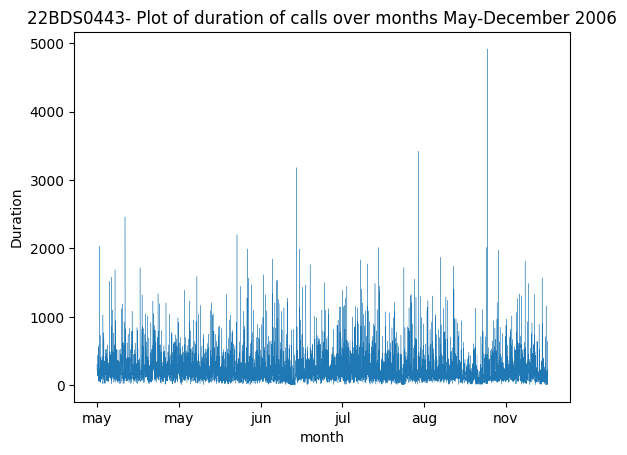

In [ ]:
#let us view the call durations over the months of 2006.
apoorva_df_subset['duration'].plot(linewidth=0.25)
plt.title('22BDS0443- Plot of duration of calls over months May-December 2006')
plt.ylabel('Duration')

### Subplots for age, duration and pdays.
Let us see if there is any trend or cycle over the months.

Text(0.5, 0.98, '22BDS0443- Subplots for age, duration of call and days since last contact over the months.')

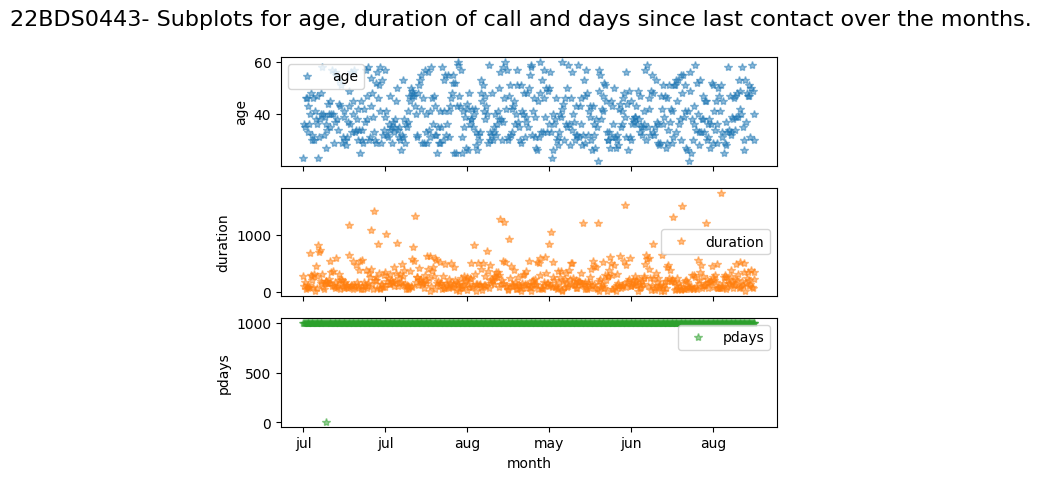

In [ ]:
apoorva_df_subset1 = apoorva_df_subset.sample(frac = 0.1)
cols_to_plot = ['age','duration','pdays']


axes= apoorva_df_subset1[cols_to_plot].plot(marker='*',alpha = 0.5, linestyle='None',subplots = True)

for ax,col in zip(axes,cols_to_plot):
  ax.set_ylabel(col)
plt.suptitle('22BDS0443- Subplots for age, duration of call and days since last contact over the months.', fontsize=16)


### Investigating within a single month.
Let us look at the call durations during the month of May.
Note: Though no specific date is mentioned the data is already chronologically sorted month-wise.

Text(0.5, 1.0, '22BDS0443- Duration of communication for the month of May')

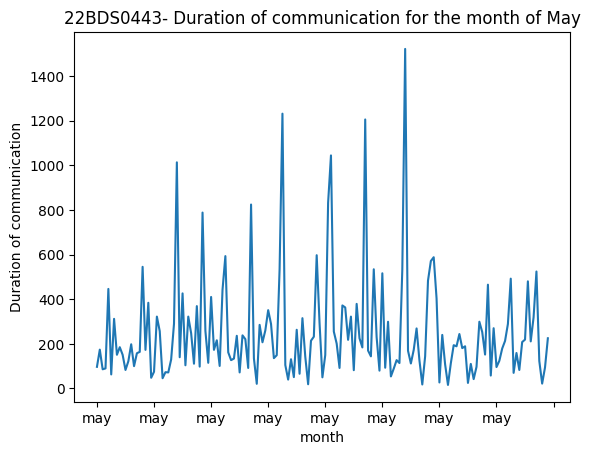

In [ ]:
apoorva_df_subset1.loc['may','duration'].plot()
plt.ylabel('Duration of communication')
plt.title('22BDS0443- Duration of communication for the month of May')

Text(0.5, 1.0, '22BDS0443- Age of people contacted in November')

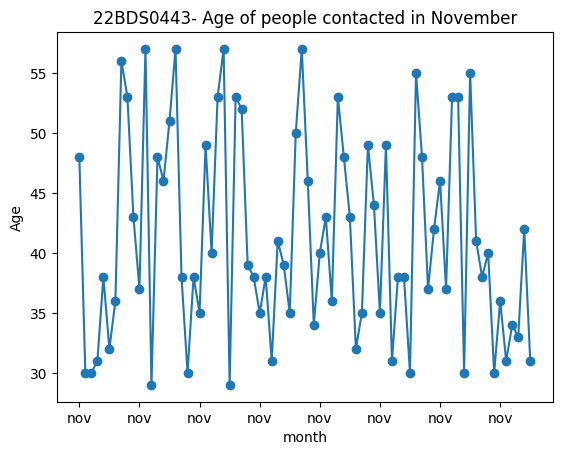

In [ ]:
#next, let us explore for the month of november. Let us check the age of people contacted in December
apoorva_df_subset1.loc['nov','age'].plot(marker='o',linestyle='-')
plt.ylabel('Age')
plt.title('22BDS0443- Age of people contacted in November')

## Grouping Time Series Data
Group the Duration of call by day of the week.

Text(0.5, 1.0, '22BDS0443- Day wise call duration')

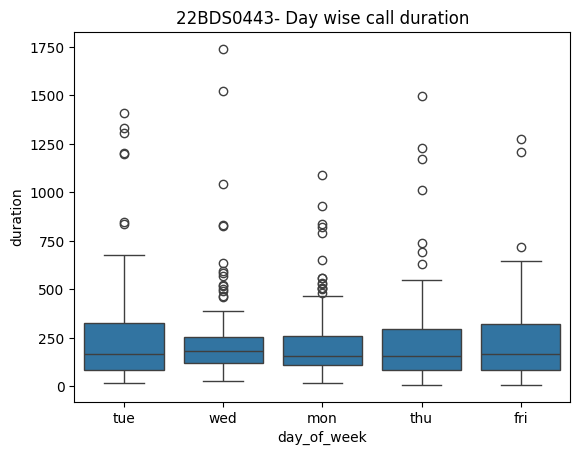

In [ ]:
#we can make a boxplot day-wise and check the outliers for each day.
sns.boxplot(data= apoorva_df_subset1, x= 'day_of_week', y='duration')
plt.title('22BDS0443- Day wise call duration')

Group the data by months and then use boxplots.

Text(0.5, 0.98, '22BDS0443- Subplots of age, duration and days month-wise')

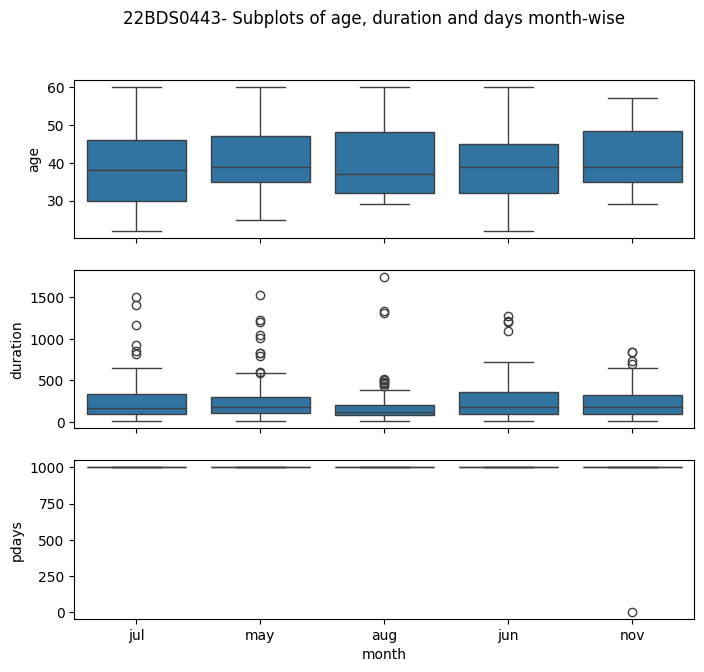

In [ ]:
# Define the correct order of months
month_order = ['may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']

fig, axes = plt.subplots(3,1, figsize=(8,7),sharex=True)
for name, ax in zip(['age','duration','pdays'],axes):
  sns.boxplot(data= apoorva_df_subset1, x='month', y=name,ax=ax)
  ax.set_ylabel(name)
plt.suptitle('22BDS0443- Subplots of age, duration and days month-wise')

#1D, 2D and ND Analysis
* 1D (Univariate) analysis studies a single variable at a time, focusing on its distribution, central tendency, and spread.

* 2D (Bivariate) analysis explores relationships between two variables, e.g., correlation or cross-tabulation.

* ND (Multivariate) analysis examines more than two variables simultaneously, often through 3D plots, contingency tables, or clustering.

## 1D Analysis on numerical variable

In [9]:
#load the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [ ]:
apoorva_df_subset.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1151,30,blue-collar,married,basic.9y,no,no,yes,telephone,may,mon,...,6,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
416,25,blue-collar,married,high.school,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4217,38,admin.,divorced,university.degree,no,no,no,cellular,aug,mon,...,2,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,no
6325,40,blue-collar,married,basic.6y,no,yes,no,cellular,may,thu,...,1,999,0,nonexistent,-1.8,92.893,-46.2,1.327,5099.1,no
1038,31,technician,single,university.degree,no,yes,no,telephone,may,fri,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


###Calculate basic summary statistics.
Summary statistics condense a dataset into key measures like mean, median, standard deviation, and variance. They provide a quick overview of central tendency, variability, and overall data characteristics.




In [ ]:
#summary statistics
ncol = "cons.conf.idx"
mean_val = apoorva_df_subset[ncol].mean()
median_val = apoorva_df_subset[ncol].median()
mode_val = apoorva_df_subset[ncol].mode().values[0]
skewness_val = apoorva_df_subset[ncol].skew()
kurtosis_val = apoorva_df_subset[ncol].kurtosis()

In [ ]:
# Print summary statistics
print("Summary Statistics:")
print(f"Mean: {mean_val:.2f}")
print(f"Median: {median_val:.2f}")
print(f"Mode: {mode_val:.2f}")
print(f"Skewness: {skewness_val:.2f}")
print(f"Kurtosis: {kurtosis_val:.2f}")

Summary Statistics:
Mean: -40.43
Median: -41.80
Mode: -36.40
Skewness: 0.39
Kurtosis: -0.34


### Find Quantiles.
Quantiles are values that divide a dataset into equal parts. They provide insights into the distribution of the data and help identify the spread and potential outliers.

In [ ]:
print(apoorva_df_subset["cons.price.idx"].quantile([0.25,0.5,0.75,0.9]))

0.25    93.075
0.50    93.918
0.75    93.994
0.90    94.465
Name: cons.price.idx, dtype: float64


# Frequeny Distribution (binning)
A frequency distribution summarizes how often each value or range of values occurs in a dataset. It is usually represented in tables or histograms to show the spread of data.

In [ ]:
x = apoorva_df_subset["cons.price.idx"]
freq_dist = pd.cut(x, bins = 10).value_counts()
freq_dist

,count
cons.price.idx,
"(93.881, 94.121]",149
"(92.681, 92.921]",55
"(94.361, 94.601]",54
"(93.401, 93.641]",53
"(92.921, 93.161]",37
"(93.161, 93.401]",33
"(92.199, 92.441]",20
"(92.441, 92.681]",4
"(94.121, 94.361]",4


### Distribution Plot

Has two components-
* Bars which are histograms that show how many data points fall within a bin.
* KDE or kerenel density estimator which is a smoothed curve giving the probability distribution of data.

We will plot this on the 'cons.conf.idx' column which stands for consumer confidence index and represents how pessimistic or optimistic consumers feel about the overall economy

* a positive value represents people are confident about the economy's future.
* a negative value represents people are pessimistic

Text(5.069444444444445, 0.5, 'Frequency')

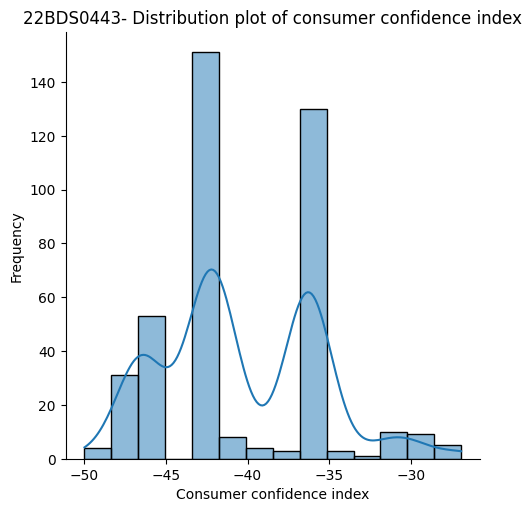

In [ ]:
sns.displot(data=apoorva_df_subset, x=ncol, kde = True)
plt.title('22BDS0443- Distribution plot of consumer confidence index')
plt.xlabel('Consumer confidence index')
plt.ylabel('Frequency')

### Histogram for marital status.
Let us create a histogram to view the marital status of people.

## 1D Data Analysis for categorical variable

In [ ]:
cat = apoorva_df_subset["marital"]
#frequency counts
print(cat.value_counts())

marital
married     256
single      102
divorced     54
Name: count, dtype: int64


In [ ]:
#relative frequency
print(cat.value_counts(normalize = True))

marital
married     0.621359
single      0.247573
divorced    0.131068
Name: proportion, dtype: float64


Text(0, 0.5, 'Frequency')

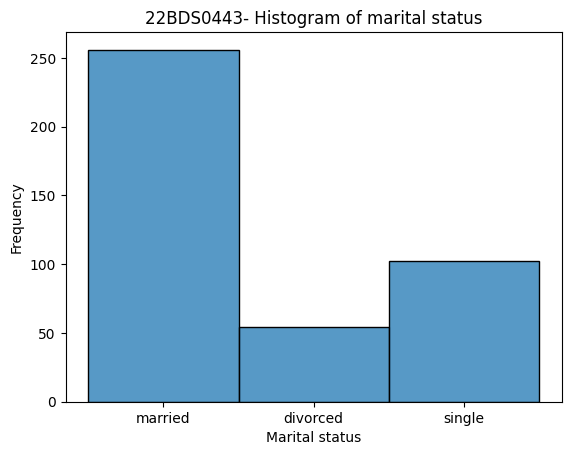

In [ ]:
sns.histplot(data=apoorva_df_subset, x = 'marital')
plt.title('22BDS0443- Histogram of marital status')
plt.xlabel('Marital status')
plt.ylabel('Frequency')

##2D Data Analysis

2D analysis involves studying the relationship between two variables, which can be numerical or categorical. Common techniques include scatter plots, correlation matrices, and contingency tables.

In [ ]:
#two way contingency tables

#categorical vs categorical
#checking how successful the bank campaign was based on marital status
apoorva_tab1= pd.crosstab(apoorva_df_subset['marital'],apoorva_df_subset['y'])
apoorva_tab1

y,no,yes
marital,,
divorced,46,8
married,232,24
single,85,17


In [ ]:
# numerical vs numerical (correlation table)
#checking if there is any correlation between age and consumer price index?
apoorva_cont= apoorva_df_subset[['age','cons.price.idx']].corr()
apoorva_cont

,age,cons.price.idx
age,1.000000,-0.012757
cons.price.idx,-0.012757,1.000000


In [ ]:
#categorical vs numerical (group means)
#hecking the mean consumer confidence index based on marital status
apoorva_contcat= apoorva_df_subset.groupby('marital')['cons.conf.idx'].mean()
apoorva_contcat

,cons.conf.idx
marital,
divorced,-40.557407
married,-40.435938
single,-40.344118


In [3]:
#profiles, relative frequencies, chi-square
from scipy.stats import chi2_contingency
apoorva_tab = pd.crosstab(apoorva_df_subset['job'],apoorva_df_subset['y'])

#row profiles
row_profiles = apoorva_tab.div(apoorva_tab.sum(axis=1),axis=0)
print(row_profiles)

y                    no       yes
job                              
admin.         0.961960  0.038040
blue-collar    0.955951  0.044049
entrepreneur   0.955882  0.044118
housemaid      0.983607  0.016393
management     0.964706  0.035294
retired        0.948052  0.051948
self-employed  0.961538  0.038462
services       0.941634  0.058366
student        0.945946  0.054054
technician     0.952528  0.047472
unemployed     0.971631  0.028369
unknown        0.906977  0.093023


In [4]:
#column profiles
col_profiles = apoorva_tab.div(apoorva_tab.sum(axis=0),axis=1)
col_profiles

y,no,yes
job,,
admin.,0.249242,0.219409
blue-collar,0.234458,0.240506
entrepreneur,0.036960,0.037975
housemaid,0.034117,0.012658
management,0.077710,0.063291
retired,0.027672,0.033755
self-employed,0.033169,0.029536
services,0.091736,0.126582
student,0.006634,0.008439


In [6]:
#relative frequencies
rel_freq = apoorva_tab/apoorva_tab.values.sum()
rel_freq

y,no,yes
job,,
admin.,0.238527,0.009432
blue-collar,0.224379,0.010339
entrepreneur,0.035371,0.001633
housemaid,0.032650,0.000544
management,0.074370,0.002721
retired,0.026483,0.001451
self-employed,0.031743,0.001270
services,0.087792,0.005442
student,0.006349,0.000363


In [7]:
#chi square test
from scipy.stats import chi2_contingency
chi2,p,dof,expected = chi2_contingency(apoorva_tab)
chi2,p

(np.float64(11.891222240142707), np.float64(0.371875044029445))

## Scatter Plot (Age vs consumer confidence index)

In [12]:
apoorva_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,35,blue-collar,married,basic.6y,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,46,blue-collar,married,basic.6y,unknown,yes,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


Text(0, 0.5, 'Consumer Confidence index')

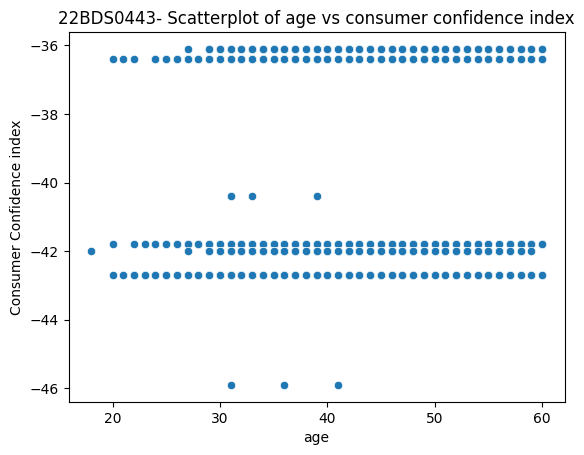

In [15]:
import seaborn as sns
sns.scatterplot(x='age',y='cons.conf.idx',data=apoorva_df_subset)
plt.title("22BDS0443- Scatterplot of age vs consumer confidence index")
plt.ylabel("Consumer Confidence index")

## 2D Boxplot of job and age


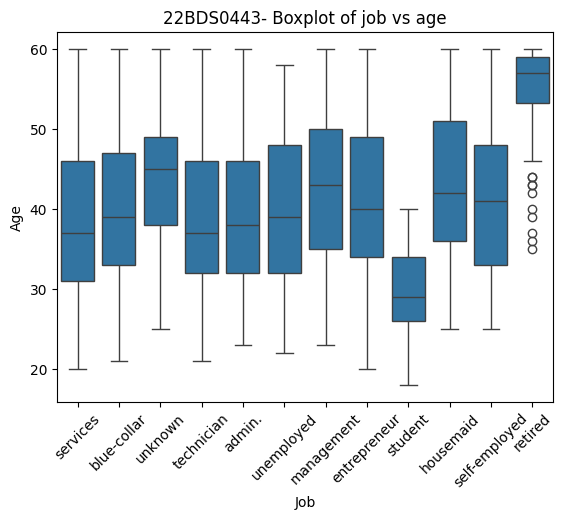

In [18]:
#2D Boxplot
sns.boxplot(data=apoorva_df_subset, x='job',y='age')
plt.title('22BDS0443- Boxplot of job vs age')
plt.xlabel('Job')
plt.ylabel('Age')
plt.xticks(rotation=45)
plt.show()

### Bar Plot
Let us view the age wise consumer confidence index.

Text(0, 0.5, 'Age')

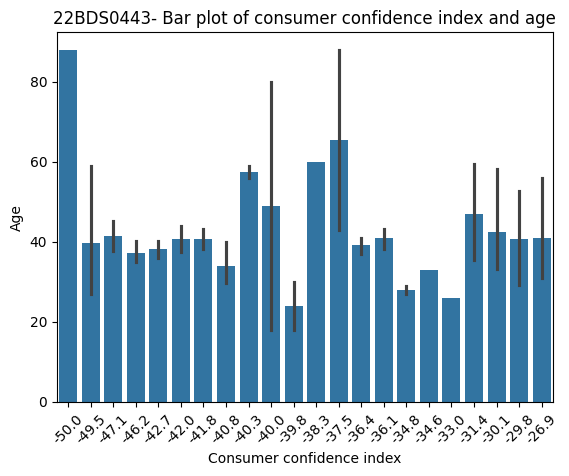

In [ ]:
sns.barplot(data=apoorva_df_subset, x='cons.conf.idx', y='age')
plt.xticks(rotation=45)
plt.title('22BDS0443- Bar plot of consumer confidence index and age')
plt.xlabel('Consumer confidence index')
plt.ylabel('Age')

# ND Data Analysis
ND (multivariate) analysis looks at more than two variables together to capture complex interactions. Examples include three-way contingency tables, 3D scatter plots, PCA, and clustering.

In [ ]:
#three way contingency tables between marital status, whether a person subscribed to the term deposit and values are jo
apoorva_three_way = pd.crosstab(apoorva_df_subset['marital'],apoorva_df_subset['y'], values=apoorva_df_subset['job'], aggfunc='size')
apoorva_three_way

y,no,yes
marital,,
divorced,46,8
married,232,24
single,85,17


## 3D Scatter Plot (Age,Consumer Confidence Index, subscribed to term deposit)

/tmp/ipython-input-3099653770.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apoorva_df_subset['y_numeric'] = apoorva_df_subset['y'].apply(lambda x: 1 if x == 'yes' else 0)


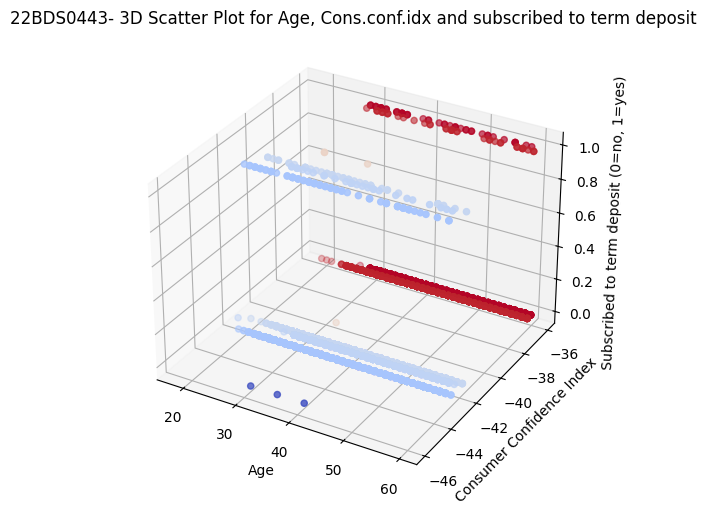

In [22]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111,projection='3d')
# Convert 'y' column to numerical values (0 for 'no', 1 for 'yes')
apoorva_df_subset['y_numeric'] = apoorva_df_subset['y'].apply(lambda x: 1 if x == 'yes' else 0)
ax.scatter(apoorva_df_subset['age'],apoorva_df_subset['cons.conf.idx'],apoorva_df_subset['y_numeric'],
           c=apoorva_df_subset['cons.conf.idx'],cmap='coolwarm')
ax.set_xlabel('Age')
ax.set_ylabel('Consumer Confidence Index')
ax.set_zlabel('Subscribed to term deposit (0=no, 1=yes)')
#plt.legend()
plt.title('22BDS0443- 3D Scatter Plot for Age, Cons.conf.idx and subscribed to term deposit')
plt.show()

#3D Barplot for Categorical Variables
Job status vs subscribed to term deposit

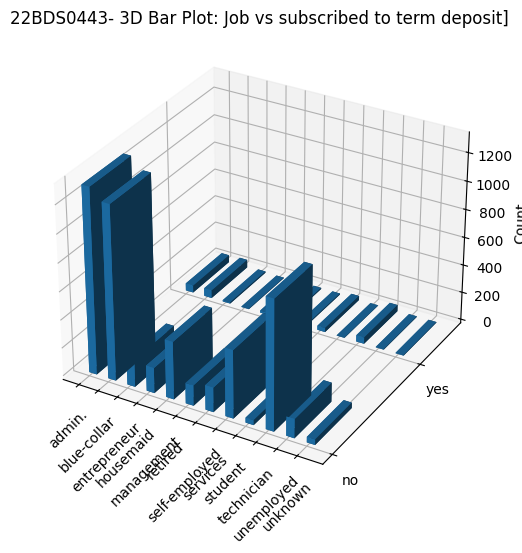

In [24]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

cat_counts = pd.crosstab(apoorva_df_subset['job'],apoorva_df_subset['y'])
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111,projection='3d')

_x = np.arange(len(cat_counts.index))
_y = np.arange(len(cat_counts.columns))
_xx, _yy = np.meshgrid(_x, _y)
x, y = _xx.ravel(), _yy.ravel()
z = np.zeros_like(x)
dx = dy = 0.4
dz = cat_counts.values.T.ravel()

ax.bar3d(x, y, z, dx, dy, dz, shade=True)
ax.set_xticks(range(len(cat_counts.index)))
ax.set_xticklabels(cat_counts.index,rotation=45)
ax.set_yticks(range(len(cat_counts.columns)))
ax.set_yticklabels(cat_counts.columns)
ax.set_zlabel("Count")
plt.title("22BDS0443- 3D Bar Plot: Job vs subscribed to term deposit]")
plt.show()

# Clustering- KMeans
Clustering is an essential technique in unsupervised learning that helps uncover hidden patterns or structures within data. By grouping a set of samples into clusters, it allows us to organize data points that are similar to each other while keeping dissimilar points in separate groups. This is particularly valuable when labels are not available, as clustering provides insights into the natural organization of the data. The centroids or representative points of these clusters capture the central tendency of each group, making it easier to analyze, summarize, and interpret complex datasets. Effective clustering reduces within-group variation, ensuring that samples within a cluster share common traits, which is crucial for applications like market segmentation, image analysis, document categorization, and anomaly detection.


In [ ]:
apoorva_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,35,blue-collar,married,basic.6y,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,46,blue-collar,married,basic.6y,unknown,yes,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## Clean the dataset.
Check for nulls and duplicates.

In [ ]:
apoorva_df.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
housing,0
loan,0
contact,0
month,0
day_of_week,0


In [ ]:
#check for duplicates
apoorva_df.duplicated().sum()

np.int64(2)

In [ ]:
#since duplicates are present, let us clean them.
apoorva_df = apoorva_df.drop_duplicates()

## Use the elbow method to find the optimal number of clusters.
The elbow method is a common technique to decide the optimal number of clusters in K-means. It works by plotting the Within-Cluster Sum of Squares (WCSS), which measures the total variance of points within each cluster, against the number of clusters
𝐾
K. As
𝐾
K increases, WCSS decreases (since more clusters mean tighter groups), but after a certain point, the rate of improvement drops sharply. This point of inflection, resembling an "elbow" in the graph, suggests the best trade-off between having too few clusters (high WCSS) and too many (overfitting).

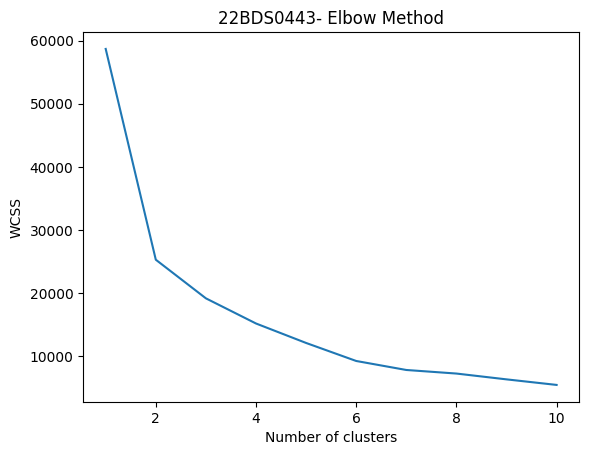

In [ ]:
from sklearn.cluster import KMeans
wcss = []
apoorva_df_subset = apoorva_df.sample(frac = 0.05)
X= apoorva_df_subset.loc[:,['age','cons.conf.idx']].values

for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++',random_state=42)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.title('22BDS0443- Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


We are clustering based on age and consumer confidence index columns.

* Age tells you demographic position.

* Consumer Confidence Index (CCI) reflects economic sentiment or optimism.
Clustering them together can help you discover segments of consumers who are similar in terms of both age and confidence level.

## Training the K-Means model on the dataset

In [ ]:
kmeans = KMeans(n_clusters=5,init='k-means++',random_state=42)
y_kmeans = kmeans.fit_predict(X)

In [ ]:
y_kmeans[:10]

array([1, 1, 4, 2, 1, 1, 0, 1, 4, 2], dtype=int32)

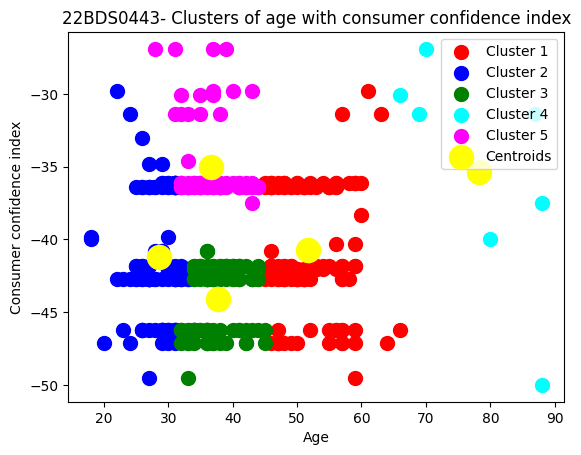

In [ ]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='yellow',label='Centroids')
plt.title('22BDS0443- Clusters of age with consumer confidence index')
plt.xlabel('Age')
plt.ylabel('Consumer confidence index')
plt.legend()
plt.show()